In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.covariance import EmpiricalCovariance  # EmpiricalCovariance 类用于估计样本的协方差矩阵
from numpy import linalg as LA


def normal_pdf_1d(x, mu, sigma):
    '''归一化 PDF'''

    scaling = 1 / sigma / np.sqrt(2 * np.pi)
    z = (x - mu) / sigma
    pdf = scaling * np.exp(-z ** 2 / 2)

    return pdf


def draw_vector(vector, RBG):
    array = np.array([[0, 0, vector[0], vector[1]]], dtype=object)
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=RBG)


(150, 5)
(150, 4)
theta = -5
mu1 = 5.554633528355593
std1 = 0.8302388779001714
var1 = 0.6892965943769356


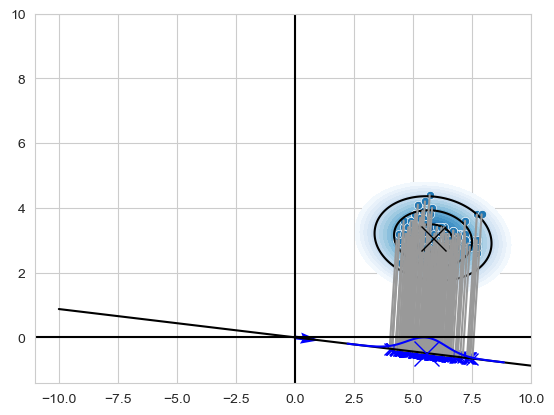

In [7]:
# Load the iris data
iris_sns = sns.load_dataset("iris", cache=False, data_home='./data/seaborn_data')

X = iris_sns.to_numpy()
print(X.shape)
X = np.array(X[:, :4])
print(X.shape)

x1 = X[:, :2]
x1 = np.array(x1, dtype=float)
# x1 = x1 - x1.mean(axis = 0)

# Mahal distance grid
# 生成坐标
xx_maha, yy_maha = np.meshgrid(
    np.linspace(0, 10, 400),
    np.linspace(0, 10, 400), )
# 将两个数组堆叠
zz_maha = np.c_[xx_maha.ravel(), yy_maha.ravel()]

# 创建 EnpiricalCovariance 对象，并用 x1 数据进行拟合
emp_cov_Xc = EmpiricalCovariance().fit(x1)

# 计算 zz_maha 中每个点的 Mahalanobis 距离的平方
# mahalanobis 方法返回每个点的马氏距离的平方
mahal_sq_Xc = emp_cov_Xc.mahalanobis(zz_maha)

mahal_sq_Xc = mahal_sq_Xc.reshape(xx_maha.shape)
# 马氏距离
mahal_d_Xc = np.sqrt(mahal_sq_Xc)

theta = -5  # -4.8575, optimal angle
print('====================')
print('theta = ' + str(theta))
theta = theta * np.pi / 180

v1 = np.array([[np.cos(theta)],
               [np.sin(theta)]])

# 旋转矩阵
T1 = v1 @ v1.T
# 线性变换
z1_2D = x1 @ T1
# 投影
z1_1D = x1 @ v1

mu1 = z1_1D.mean()
std1 = z1_1D.std(ddof=1)
var1 = z1_1D.var(ddof=1)

print('mu1 = ' + str(mu1))
print('std1 = ' + str(std1))
print('var1 = ' + str(var1))

x1_array = np.linspace(mu1 - 4 * std1, mu1 + 4 * std1, 100)
# 旋转矩阵
R1 = np.array([[np.cos(theta), np.sin(theta)],
               [-np.sin(theta), np.cos(theta)]])
# 计算 PDF 值
pdf1_array = normal_pdf_1d(x1_array, mu1, std1)
# 堆叠
PDF1 = np.column_stack((x1_array, pdf1_array))
# 旋转
PDF1_v1 = PDF1 @ R1

fig, ax = plt.subplots()

# 马氏距离
plt.contourf(xx_maha, yy_maha, mahal_d_Xc, cmap='Blues_r', levels=np.linspace(0, 4, 21))
plt.contour(xx_maha, yy_maha, mahal_d_Xc, colors='k', levels=[1, 2, 3])

# scatter plot of iris data
# 散点图
ax = sns.scatterplot(x=x1[:, 0], y=x1[:, 1])

# projection lines
plt.plot(z1_2D[:, 0], z1_2D[:, 1], marker='x', markersize=8, color='b')

plt.plot(([i for (i, j) in z1_2D], [i for (i, j) in x1]),
         ([j for (i, j) in z1_2D], [j for (i, j) in x1]), c=[0.6, 0.6, 0.6])

plt.plot((-10, 10), (-10 * np.tan(theta), 10 * np.tan(theta)), c='k')

# plot the projected PDF curves
plt.plot(PDF1_v1[:, 0], PDF1_v1[:, 1],
         color='b')

# plot the centroid and projected centroids

plt.plot(x1[:, 0].mean(), x1[:, 1].mean(),
         marker='x',
         color='k',
         markersize=18)

plt.plot(z1_2D[:, 0].mean(), z1_2D[:, 1].mean(),
         marker='x',
         color='b',
         markersize=18)

# plot the vectors of v1 and v2

draw_vector(v1, 'b')

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')

ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_xticks(np.arange(0, 8 + 1, step=1))
ax.set_yticks(np.arange(0, 8 + 1, step=1))
ax.axis('scaled')
# ax.grid(linestyle='--', linewidth=0.25, color=[0.7,0.7,0.7])
ax.set_xbound(lower=-10, upper=10)
ax.set_ybound(lower=-10, upper=10)

